In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.playerdashboardbyshootingsplits import PlayerDashboardByShootingSplits
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

In [3]:
from nba_api.stats.endpoints.teamplayeronoffsummary import TeamPlayerOnOffSummary

from nba_api.stats.static.teams import get_teams

In [4]:
data_frames = []

for team in get_teams():
    team_id = team['id']
    on_off = TeamPlayerOnOffSummary(team_id=team_id, season='2021-22')
    merged_df = pd.merge(left=on_off.get_data_frames()[1], right=on_off.get_data_frames()[2], on=('TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'VS_PLAYER_ID', 'VS_PLAYER_NAME'), suffixes=('_ON', '_OFF'))
    data_frames.append(merged_df)
    time.sleep(0.15)



In [5]:
total_df = pd.concat(data_frames)

total_df.loc[:, 'MIN_G'] = total_df.MIN_ON / total_df.GP_ON

total_df = total_df.sort_values(by='MIN_G', ascending=False)

total_df = total_df.loc[total_df.GP_ON > 5]


In [6]:
total_df = total_df.loc[total_df.MIN_G > 17]

In [7]:
total_df

GROUP_SET_ON     TEAM_ID TEAM_ABBREVIATION               TEAM_NAME  \
15  On/Off Court  1610612761               TOR         Toronto Raptors   
12  On/Off Court  1610612738               BOS          Boston Celtics   
8   On/Off Court  1610612747               LAL      Los Angeles Lakers   
6   On/Off Court  1610612740               NOP    New Orleans Pelicans   
1   On/Off Court  1610612761               TOR         Toronto Raptors   
..           ...         ...               ...                     ...   
7   On/Off Court  1610612757               POR  Portland Trail Blazers   
14  On/Off Court  1610612759               SAS       San Antonio Spurs   
9   On/Off Court  1610612758               SAC        Sacramento Kings   
14  On/Off Court  1610612738               BOS          Boston Celtics   
11  On/Off Court  1610612748               MIA              Miami Heat   

    VS_PLAYER_ID    VS_PLAYER_NAME COURT_STATUS_ON  GP_ON  MIN_ON  \
15       1627832    VanVleet, Fred              On     12   462.0   
12       1628369     Tatum, Jayson              On     11   409.0   
8           2544     James, LeBron              On      6   222.0   
6        1627742   Ingram, Brandon              On      6   222.0   
1        1628384       Anunoby, OG              On     12   443.0   
..           ...               ...             ...    ...     ...   
7        1626204  Nance Jr., Larry              On     12   216.0   
14        201152   Young, Thaddeus              On      8   141.0   
9         203458         Len, Alex              On      8   139.0   
14       1629684   Williams, Grant              On     11   191.0   
11       1629622        Strus, Max              On      6   104.0   

    PLUS_MINUS_ON  ...  NET_RATING_ON  GROUP_SET_OFF  COURT_STATUS_OFF GP_OFF  \
15            2.2  ...            1.8   On/Off Court               Off     12   
12            3.0  ...            2.7   On/Off Court               Off     11   
8             3.2  ...            2.9   On/Off Court               Off     12   
6            -9.1  ...           -9.0   On/Off Court               Off     12   
1             0.4  ...            1.4   On/Off Court               Off     12   
..            ...  ...            ...            ...               ...    ...   
7             3.6  ...            5.5   On/Off Court               Off     12   
14           11.9  ...            9.8   On/Off Court               Off     11   
9            -4.1  ...           -1.0   On/Off Court               Off     12   
14           -3.8  ...           -4.4   On/Off Court               Off     11   
11           20.8  ...           19.4   On/Off Court               Off     11   

   MIN_OFF  PLUS_MINUS_OFF  OFF_RATING_OFF  DEF_RATING_OFF  NET_RATING_OFF  \
15   114.0            -2.1           104.1           107.5            -3.4   
12   144.0            -8.0            96.1           106.3           -10.2   
8    369.0            -2.7           102.1           104.7            -2.6   
6    354.0           -12.9           100.5           112.5           -11.9   
1    133.0             4.3            99.6            94.7             4.9   
..     ...             ...             ...             ...             ...   
7    360.0            -0.7           107.2           108.9            -1.6   
14   392.0            -1.5           106.3           106.9            -0.5   
9    437.0             0.5           111.0           109.8             1.1   
14   362.0             2.3           103.2           101.3             1.8   
11   434.0             4.2           110.7           105.2             5.4   

        MIN_G  
15  38.500000  
12  37.181818  
8   37.000000  
6   37.000000  
1   36.916667  
..        ...  
7   18.000000  
14  17.625000  
9   17.375000  
14  17.363636  
11  17.333333  

[227 rows x 22 columns]

In [8]:
plt.style.use('fivethirtyeight')

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    #print(path)
    return OffsetImage(plt.imread(path), zoom=1.0)

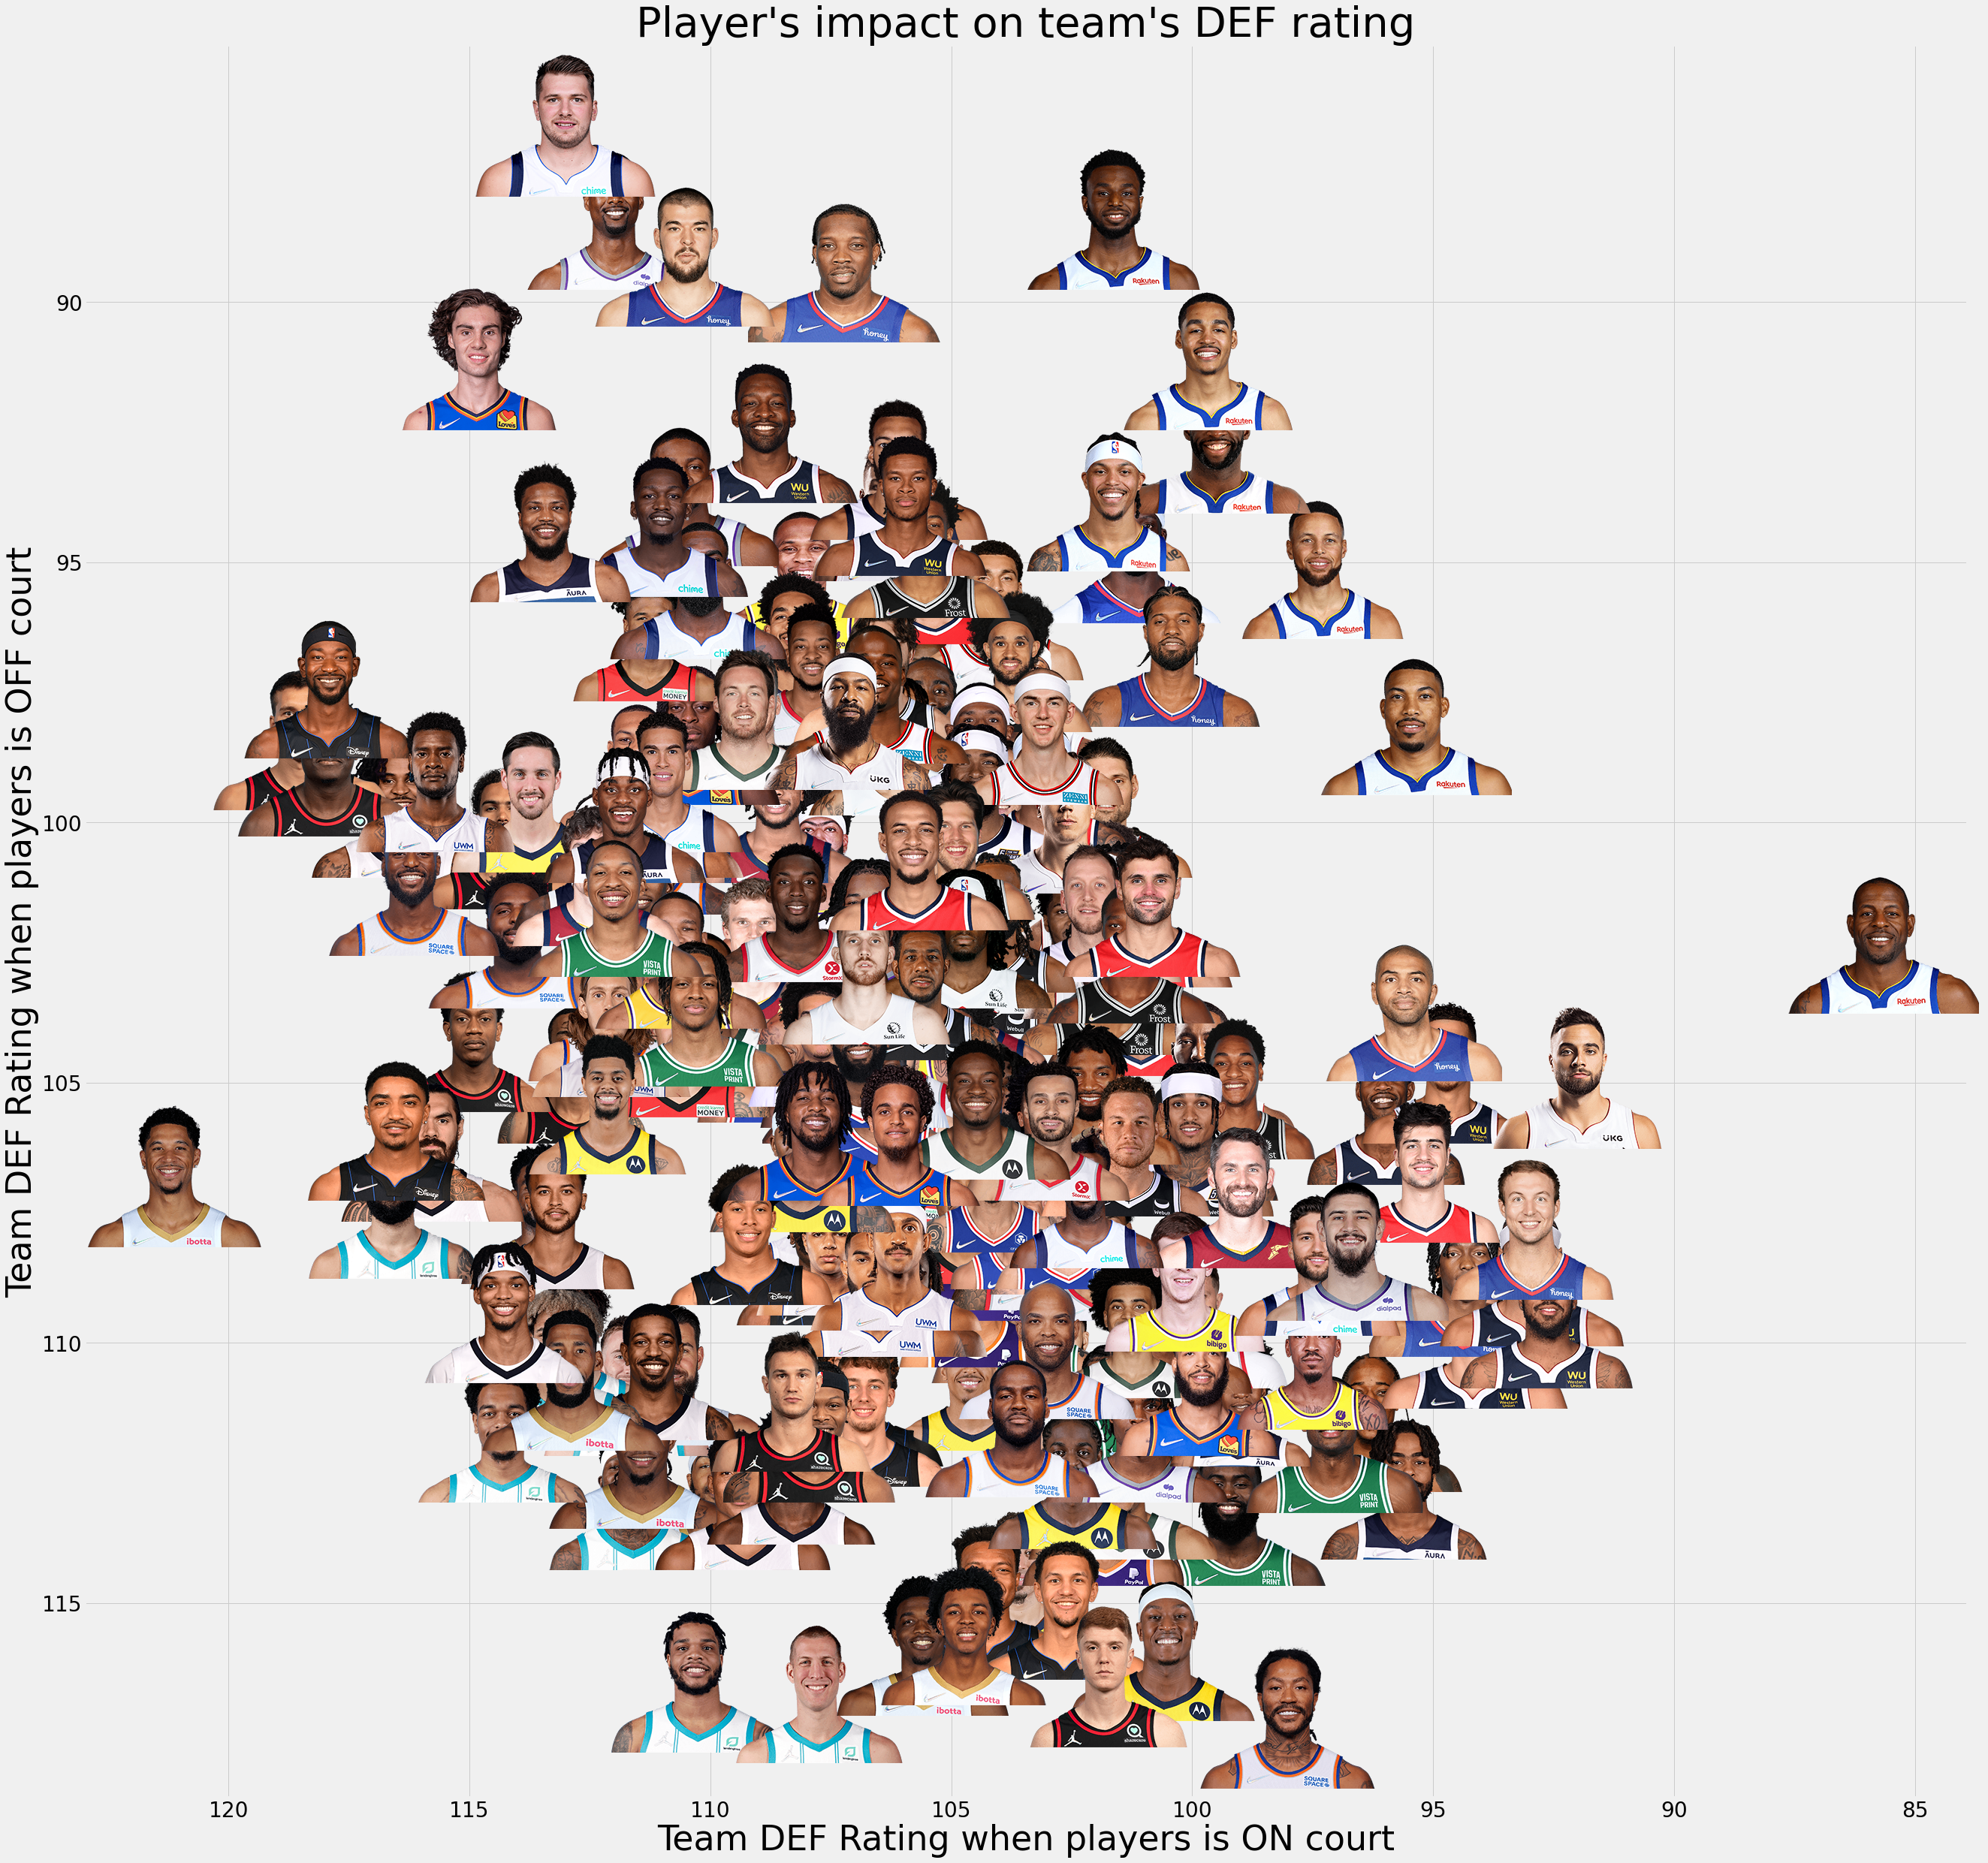

In [10]:
fig, ax = plt.subplots(figsize=(40, 40))

x=total_df.DEF_RATING_ON
y=total_df.DEF_RATING_OFF
ax.scatter(x=x, y=y, s=100)

paths = []
for i in range(len(total_df)):
    item = total_df.iloc[i]
    paths.append(f'player_imgs/{item.VS_PLAYER_ID}.png')

for x0, y0, path in zip(x.tolist(), y.tolist(), paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    

ax.tick_params(labelsize=28)
ax.set_xlabel("Team DEF Rating when players is ON court", size=46)
ax.set_ylabel("Team DEF Rating when players is OFF court", size=46)
ax.set_title("Player's impact on team's DEF rating", size=56)
ax.invert_xaxis()
ax.invert_yaxis()
#ax.grid(lw=2.5)


In [9]:
total_df.loc[:, 'DEF_RATING_DIFF'] = total_df.DEF_RATING_ON - total_df.DEF_RATING_OFF

In [10]:
sorted_df = total_df.sort_values(by='DEF_RATING_DIFF')

In [11]:
sorted_df = sorted_df.reset_index()

In [12]:
sorted_df.loc[sorted_df.VS_PLAYER_NAME == 'Schroder, Dennis']

index  GROUP_SET_ON     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME  \
29     10  On/Off Court  1610612738               BOS  Boston Celtics   

    VS_PLAYER_ID    VS_PLAYER_NAME COURT_STATUS_ON  GP_ON  MIN_ON  ...  \
29        203471  Schroder, Dennis              On     11   351.0  ...   

    GROUP_SET_OFF  COURT_STATUS_OFF  GP_OFF  MIN_OFF PLUS_MINUS_OFF  \
29   On/Off Court               Off      11    202.0           -7.1   

   OFF_RATING_OFF  DEF_RATING_OFF  NET_RATING_OFF      MIN_G  DEF_RATING_DIFF  
29          101.2           109.2            -8.0  31.909091             -9.6  

[1 rows x 24 columns]

In [13]:
interesting_players = [
    'DeRozan, DeMar',
    'Lowry, Kyle',
    'Barton, Will',
    'Mitchell, Donovan',
    'Brown, Jaylen',
    'Curry, Stephen',
    'Schroder, Dennis',
    'Ball, Lonzo',
    'Edwards, Anthony',
    'Smart, Marcus',
    'VanVleet, Fred',
    'Murray, Dejounte'
]

In [14]:
subset_df = sorted_df.loc[sorted_df.VS_PLAYER_NAME.isin(interesting_players)]

## Table

In [15]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
zoom = 0.5

player_root_dir = f'player_imgs/'

def get_player_img(player_id, zoom=0.75):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)


In [16]:
fig, ax = plt.subplots(figsize=(40, 40))
number_size = 42
font_size = 36
font_title = 44
title_size = 64
#top = 10

sorted_open_df = subset_df
top = len(subset_df)
for i in range(top):
    item = subset_df.iloc[i]
    splitted_name = item.VS_PLAYER_NAME.split(',')
    player_name = f"{splitted_name[1].strip()} {splitted_name[0].strip()}"
    player_id = find_players_by_full_name(player_name)[0]['id']
    y_coord = top - i - 1
    #if i % 2 == 1:
    #    color = '#EAE8E8'
    #    rect = Rectangle((-4.5, y_coord + 0.5), width=50, height=1, fill=True, color=color)
    #    ax.add_patch(rect)
    
    ab = AnnotationBbox(get_player_img(player_id), (0.2, y_coord), frameon=False)
    ax.add_artist(ab)
    #ax.text(x=0.25, y=y_coord, ha='left', va='center', s=item.SEASON, size=font_size)
    ax.text(x=0.4, y=y_coord, ha='left', va='center', s=player_name, size=font_size)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=30, color='#A0A0A0', alpha=0.75, lw=2)

    ax.text(x=2.0, y=y_coord, ha='center', va='center', s=f"{item.DEF_RATING_ON}", size=number_size)
    ax.text(x=2.9, y=y_coord, ha='center', va='center', s=f"{item.DEF_RATING_OFF}", size=number_size)
    ax.text(x=3.8, y=y_coord, ha='center', va='center', s=f"{item.DEF_RATING_DIFF:.2f}", size=number_size)
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
#ax.text(x=0.25, y=top, s='Season', ha='left', va='center', size=font_title)

ax.text(x=0.4, y=top, s='Player', ha='left', va='center', size=font_title)
ax.text(x=2.0, y=top, ha='center', va='center', s="DEF Rating ON", size=font_title)
ax.text(x=2.9, y=top, ha='center', va='center', s="DEF Rating OFF", size=font_title)
ax.text(x=3.8, y=top, ha='center', va='center', s="DEF Rating DIFF", size=font_title)
#ax.text(x=2.7, y=top, ha='center', va='center', s="Recovered%", size=font_title)

#ax.text(x=2.75, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=30)
#ax.text(x=0.25, y=-0.75, s='data: nba.com', ha='left', va='center', size=30)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=30, color='black', alpha=0.75, lw=4)
#ax.axvline(x=4.2, ymin=0.1, ymax=0.95, lw=2, color='black', ls='--')
ax.set_title("How does team's Defensive rating change when player is ON/OFF court?", size=title_size)
    
ax.set_ylim(bottom=-1, top=top+1)
ax.set_xlim(left=-0, right=4.5)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ab = AnnotationBbox(OffsetImage(plt.imread(f'../../twitter_logo.png'), zoom=0.05), (3.7, -0.75), frameon=False)
ax.add_artist(ab)
ax.text(x=3.8, y=-0.8, ha='left', s='@daniel_bratulic', size=28)
ax.text(x=0.4, y=-0.8, ha='left', s='source: nba.com', size=28)

#plt.savefig('block_recoveries.png', dpi=120, bbox_inches='tight')

Text(0.4, -0.8, 'source: nba.com')

In [59]:
warriors_players = total_df.loc[total_df.TEAM_NAME == 'Golden State Warriors']

In [61]:
warriors_players.loc[:, 'DEF_RATING_DIFF'] = warriors_players.DEF_RATING_ON - warriors_players.DEF_RATING_OFF

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
warriors_players = warriors_players.sort_values(by='DEF_RATING_ON')

In [65]:
fig, ax = plt.subplots(figsize=(40, 40))
number_size = 42
font_size = 36
font_title = 44
title_size = 64
#top = 10

sorted_open_df = warriors_players
top = len(warriors_players)
for i in range(top):
    item = warriors_players.iloc[i]
    splitted_name = item.VS_PLAYER_NAME.split(',')
    player_name = f"{splitted_name[1].strip()} {splitted_name[0].strip()}"
    player_id = find_players_by_full_name(player_name)[0]['id']
    y_coord = top - i - 1
    #if i % 2 == 1:
    #    color = '#EAE8E8'
    #    rect = Rectangle((-4.5, y_coord + 0.5), width=50, height=1, fill=True, color=color)
    #    ax.add_patch(rect)
    
    ab = AnnotationBbox(get_player_img(player_id), (0.2, y_coord), frameon=False)
    ax.add_artist(ab)
    #ax.text(x=0.25, y=y_coord, ha='left', va='center', s=item.SEASON, size=font_size)
    ax.text(x=0.4, y=y_coord, ha='left', va='center', s=player_name, size=font_size)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=30, color='#A0A0A0', alpha=0.75, lw=2)

    ax.text(x=2.0, y=y_coord, ha='center', va='center', s=f"{item.DEF_RATING_ON}", size=number_size)
    ax.text(x=2.9, y=y_coord, ha='center', va='center', s=f"{item.DEF_RATING_OFF}", size=number_size)
    ax.text(x=3.8, y=y_coord, ha='center', va='center', s=f"{item.DEF_RATING_DIFF:.2f}", size=number_size)
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
#ax.text(x=0.25, y=top, s='Season', ha='left', va='center', size=font_title)

ax.text(x=0.4, y=top, s='Player', ha='left', va='center', size=font_title)
ax.text(x=2.0, y=top, ha='center', va='center', s="DEF Rating ON", size=font_title)
ax.text(x=2.9, y=top, ha='center', va='center', s="DEF Rating OFF", size=font_title)
ax.text(x=3.8, y=top, ha='center', va='center', s="DEF Rating DIFF", size=font_title)
#ax.text(x=2.7, y=top, ha='center', va='center', s="Recovered%", size=font_title)

#ax.text(x=2.75, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=30)
#ax.text(x=0.25, y=-0.75, s='data: nba.com', ha='left', va='center', size=30)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=30, color='black', alpha=0.75, lw=4)
#ax.axvline(x=4.2, ymin=0.1, ymax=0.95, lw=2, color='black', ls='--')
ax.set_title("How does team's Defensive rating change when player is ON/OFF court?", size=title_size)
    
ax.set_ylim(bottom=-1, top=top+1)
ax.set_xlim(left=-0, right=4.5)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ab = AnnotationBbox(OffsetImage(plt.imread(f'../../twitter_logo.png'), zoom=0.05), (3.7, -0.75), frameon=False)
ax.add_artist(ab)
ax.text(x=3.8, y=-0.8, ha='left', s='@daniel_bratulic', size=28)
ax.text(x=0.4, y=-0.8, ha='left', s='source: nba.com', size=28)

#plt.savefig('block_recoveries.png', dpi=120, bbox_inches='tight')

Text(0.4, -0.8, 'source: nba.com')